### **MNIST Handwritten Digits Dataset - Tasks**

1. Load the MNIST dataset and normalize the pixel values to the range 0-1.
2. Reshape the 28x28 images into a 1D vector of size 784 for ANN compatibility.
3. Build a simple ANN model with:
   - An input layer with 784 neurons.
   - One hidden layer with 128 neurons and ReLU activation.
   - An output layer with 10 neurons and softmax activation.
4. Compile the model using the Adam optimizer, sparse categorical crossentropy as the loss function, and accuracy as a metric.
5. Train the model on the training data for 10 epochs with a batch size of 32.
6. Evaluate the model on the test dataset and report the test accuracy.
7. Use the trained model to predict the classes for 5 random test samples and display the images with their predicted and actual labels.
8. Calculate precision, recall, and F1-score for each class using the test dataset and include these metrics in the evaluation report.
9. Save the trained model to a file and reload it for predictions on new data.

### **How to Load the MNIST Dataset**

```python
from tensorflow.keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

In [1]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
train_images = train_images.reshape((train_images.shape[0], 28*28))

In [4]:
test_images = test_images.reshape((test_images.shape[0], 28*28))

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(784,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8725 - loss: 0.4382
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9651 - loss: 0.1219
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0797
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9825 - loss: 0.0583
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9874 - loss: 0.0415
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9900 - loss: 0.0331
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9919 - loss: 0.0273
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0212
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9954 - loss: 0.0163
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9964 - loss: 0.0131


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0956
Test Accuracy: 0.9789999723434448


In [9]:
import numpy as np
random_indices = np.random.choice(len(test_images), size=5, replace=False)
predictions = model.predict(test_images[random_indices])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


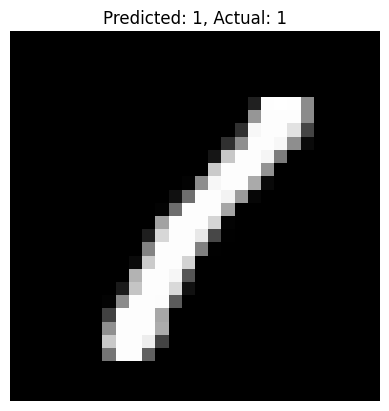

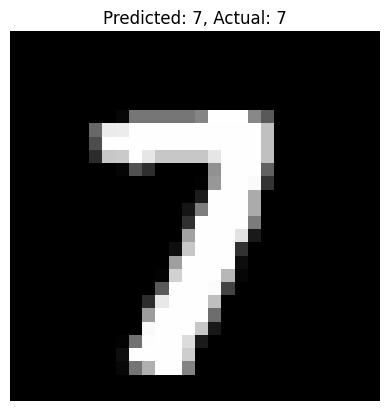

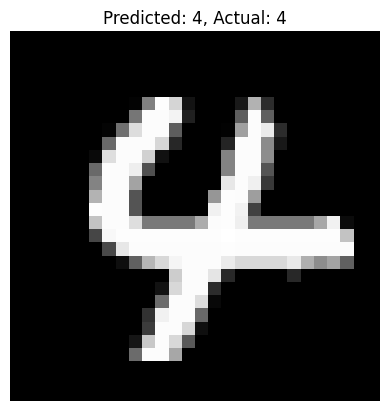

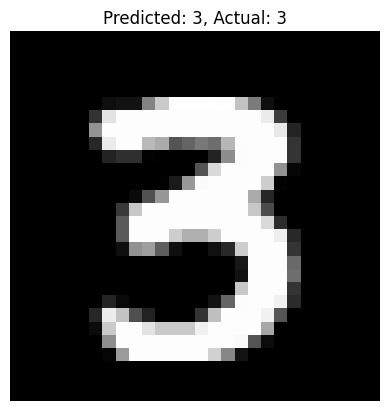

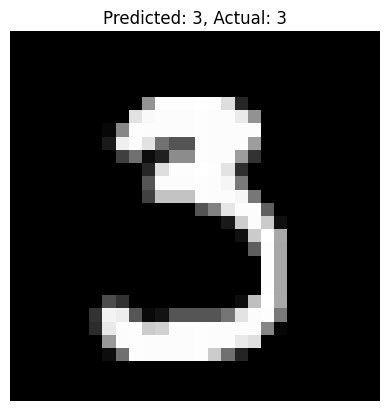

In [10]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.imshow(test_images[random_indices[i]].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {test_labels[random_indices[i]]}")
  plt.axis('off')
  plt.show()

In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(test_labels, y_pred_classes)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [12]:
model.save('mnist_model.h5')

In [13]:
load = tf.keras.models.load_model('mnist_model.h5')